In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

pd.set_option('display.max_columns', 80)

In [5]:
outdir = '../output/250409_summary_heatmap'

In [6]:
os.makedirs(outdir, exist_ok=True)

## CSF no split RBD

In [26]:
f_fc = '/home/yy693/pi_hafler/ASAP/scanpy/250407_CSF_downstream/scCODA_FC.csv'
f_credible = '/home/yy693/pi_hafler/ASAP/scanpy/250407_CSF_downstream/scCODA_woAge_credible.FDR{}.csv'

list_p = [0.05, 0.1, 0.2, 0.3]

In [27]:
list_celltypes_retain = [
      'CSF Mac',
 'cDC1',
 'cDC2',
 'pDC',
    'CD14 Mono',
 'Cycling Myeloid',

'CD4 Tnaive', 'CD4 Tcm', 'CD4 Tem', 'Treg',
 'CD8 Tem_emra',
   'NK CD16','NK CD56', 'B memory'
]

In [28]:
df_fc =  pd.read_csv(f_fc, index_col=0).T
df_fc = df_fc.loc[list_celltypes_retain]
df_fc.head()

,RBD,PD,PD-RBD
CSF Mac,1.339772,0.949431,1.374055
cDC1,2.354625,0.752935,0.894373
cDC2,1.518542,1.585434,1.548678
pDC,1.217498,1.662407,1.430104
CD14 Mono,1.571939,1.552980,1.220658


In [29]:
np.log2(df_fc)

,RBD,PD,PD-RBD
CSF Mac,0.421987,-0.074865,0.458440
cDC1,1.235497,-0.409402,-0.161051
cDC2,0.602686,0.664878,0.631037
pDC,0.283919,0.733274,0.516120
CD14 Mono,0.652545,0.635039,0.287659
Cycling Myeloid,1.065598,-0.995107,-0.886665
CD4 Tnaive,0.320461,0.182945,0.027430
CD4 Tcm,-0.159918,-0.044802,-0.072328
CD4 Tem,-0.217796,-0.354978,-0.049304
Treg,0.106637,0.455893,-0.434019


In [30]:
dict_df_p = {p: pd.read_csv(f_credible.format(p), index_col=0) for p in list_p}
for p, d in dict_df_p.items():
    d['condition'] = d.index.str.split('T.').str.get(1).str.replace(']', '')
    d = d[d['Cell Type'].isin(list_celltypes_retain)]
    dict_df_p[p] = d
dict_df_p[0.05].head()

,Cell Type,Final Parameter,condition
Covariate,,,
group[T.RBD],B memory,False,RBD
group[T.RBD],CD4 Tnaive,False,RBD
group[T.RBD],CD4 Tcm,True,RBD
group[T.RBD],CD4 Tem,False,RBD
group[T.RBD],Treg,False,RBD


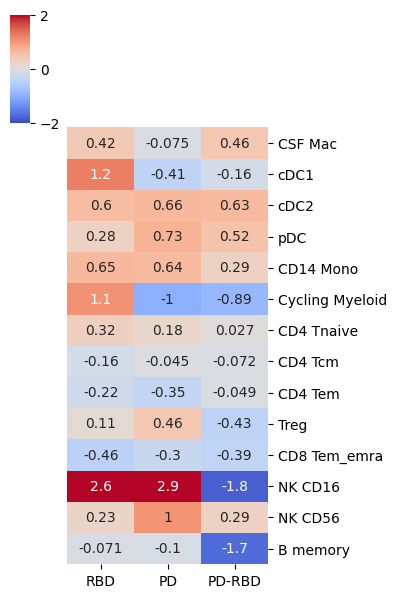

In [31]:
sns.clustermap(np.log2(df_fc), annot=True, cmap='coolwarm', center=0, vmin=-2, vmax=2,
figsize=(4, 6), col_cluster=False, row_cluster=False)

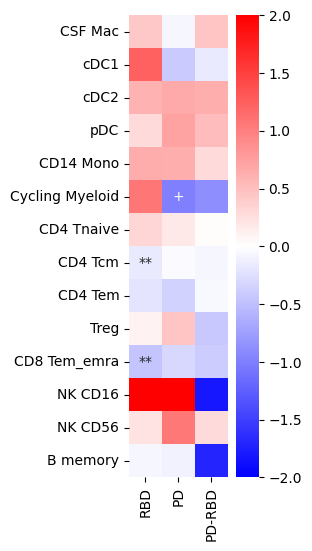

In [32]:
# Placeholder for significance annotations based on `Final Parameter`
annotations = pd.DataFrame('', index=df_fc.index, columns=df_fc.columns)

dict_symbols = {0.05: '**', 0.1: '*', 0.2: '+', 0.3: ''}

# Assign symbols based on cutoff
for p, df in dict_df_p.items():
    # Get rows marked as significant (Final Parameter is True)
    significant = df[df['Final Parameter'] == True]
    # print(significant)
    symbol = dict_symbols[p]
    
    # Update annotations for significant entries
    for pos,row in significant.iterrows():
        cell_type = row['Cell Type']
        condition = row['condition']
        if annotations.loc[cell_type, condition] == '':
            annotations.loc[cell_type, condition] = symbol

# Plot heatmap with annotations
plt.figure(figsize=(2, 6))
sns.heatmap(np.log2(df_fc), annot=annotations, fmt='', cmap="bwr", cbar=True, vmin=-2, vmax=2, square=True)
plt.xticks(rotation=90)
plt.savefig(os.path.join(outdir, 'scCODA_CSF_heatmap.pdf'), bbox_inches='tight')

In [33]:
significant

,Cell Type,Final Parameter,condition
Covariate,,,
group[T.RBD],CD4 Tcm,True,RBD
group[T.RBD],CD8 Tem_emra,True,RBD
group[T.PD],Cycling Myeloid,True,PD
group[T.PD-RBD],CD4 Tnaive,True,PD-RBD


In [34]:
annotations

,RBD,PD,PD-RBD
CSF Mac,,,
cDC1,,,
cDC2,,,
pDC,,,
CD14 Mono,,,
Cycling Myeloid,,+,
CD4 Tnaive,,,
CD4 Tcm,**,,
CD4 Tem,,,
Treg,,,


## CSF split RBD

In [35]:
f_fc = '/home/yy693/pi_hafler/ASAP/scanpy/250407_CSF_downstream/scCODA_split_RBD_FC.csv'
f_credible = '/home/yy693/pi_hafler/ASAP/scanpy/250407_CSF_downstream/scCODA_split_RBD_woAge_credible.FDR{}.csv'

list_p = [0.05, 0.1, 0.2, 0.3]

In [36]:
df_fc =  pd.read_csv(f_fc, index_col=0).T
df_fc = df_fc.loc[list_celltypes_retain]
df_fc.head()

dict_df_p = {p: pd.read_csv(f_credible.format(p), index_col=0) for p in list_p}
for p, d in dict_df_p.items():
    d['condition'] = d.index.str.split('T.').str.get(1).str.replace(']', '')
    d = d[d['Cell Type'].isin(list_celltypes_retain)]
    dict_df_p[p] = d
dict_df_p[0.05].head()

,Cell Type,Final Parameter,condition
Covariate,,,
group[T.PD],B memory,False,PD
group[T.PD],CD4 Tnaive,False,PD
group[T.PD],CD4 Tcm,False,PD
group[T.PD],CD4 Tem,False,PD
group[T.PD],Treg,False,PD


In [37]:
pd.read_csv(f_fc, index_col=0).T

,RBD-LowIntm,RBD-High,PD,PD-RBD
B naive,1.140965,10.263805,1.953357,0.730067
B memory,1.057195,0.911231,0.930062,0.306722
ASC,24.694628,8.826886,73.344958,2.370226
CD4 Tnaive,1.696138,1.073656,1.135199,1.019195
CD4 Tcm,1.137713,0.800131,0.969423,0.951102
CD4 Tem,1.028923,0.793730,0.781882,0.966403
Treg,1.196998,1.029649,1.371631,0.740197
CD8 Tem_emra,0.676285,0.744118,0.810023,0.762379
Cycling T,1.701817,2.561686,1.099139,2.105674
NK CD16,0.212509,8.271409,7.457434,0.283271


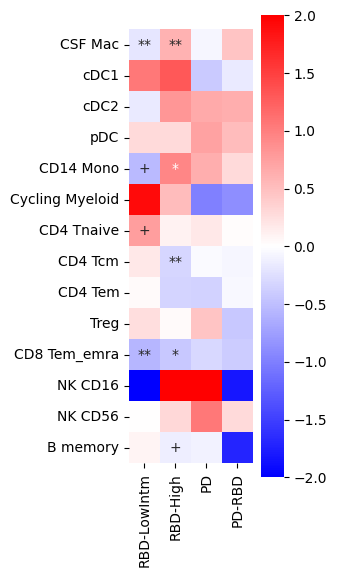

In [38]:
# Placeholder for significance annotations based on `Final Parameter`
annotations = pd.DataFrame('', index=df_fc.index, columns=df_fc.columns)

dict_symbols = {0.05: '**', 0.1: '*', 0.2: '+', 0.3: ''}

# Assign symbols based on cutoff
for p, df in dict_df_p.items():
    # Get rows marked as significant (Final Parameter is True)
    significant = df[df['Final Parameter'] == True]
    # print(significant)
    symbol = dict_symbols[p]
    
    # Update annotations for significant entries
    for pos,row in significant.iterrows():
        cell_type = row['Cell Type']
        condition = row['condition']
        if annotations.loc[cell_type, condition] == '':
            annotations.loc[cell_type, condition] = symbol

# Plot heatmap with annotations
plt.figure(figsize=(2, 6))
sns.heatmap(np.log2(df_fc), annot=annotations, fmt='', cmap="bwr", cbar=True, vmin=-2, vmax=2, square=True)
plt.xticks(rotation=90)
plt.savefig(os.path.join(outdir, 'scCODA_CSF_split_RBD_heatmap.pdf'), bbox_inches='tight')

## BLD no split RBD

In [43]:
f_fc = '/home/yy693/pi_hafler/ASAP/scanpy/250407_BLD_downstream/scCODA_FC.csv'
f_credible = '/home/yy693/pi_hafler/ASAP/scanpy/250407_BLD_downstream/scCODA_woAge_credible.FDR{}.csv'

list_p = [0.05, 0.1, 0.2, 0.3]

In [46]:
list_celltypes_retain = ['CD14 Mono', 'CD16 Mono', 'cDC2', 'pDC',
 'CD4 Tnaive',
 'CD4 Tcm',
  'CD4 Tem',
   'Treg',
    'CD8 Tnaive',
 'CD8 Tem',
 'CD8CD4 Temra',
 'MAIT',
 'Tgd',
 'NK CD16',
 'NK CD56',
 'NK Cycling',
 'B naive',
 'B memory',
 'ABC',
 ]

In [47]:
df_fc =  pd.read_csv(f_fc, index_col=0).T
df_fc = df_fc.loc[list_celltypes_retain]
df_fc.head()

dict_df_p = {p: pd.read_csv(f_credible.format(p), index_col=0) for p in list_p}
for p, d in dict_df_p.items():
    d['condition'] = d.index.str.split('T.').str.get(1).str.replace(']', '')
    d = d[d['Cell Type'].isin(list_celltypes_retain)]
    dict_df_p[p] = d

dict_df_p[0.05].head()

,Cell Type,Final Parameter,condition
Covariate,,,
group[T.PD],B naive,False,PD
group[T.PD],B memory,False,PD
group[T.PD],ABC,False,PD
group[T.PD],CD4 Tnaive,True,PD
group[T.PD],CD4 Tcm,False,PD


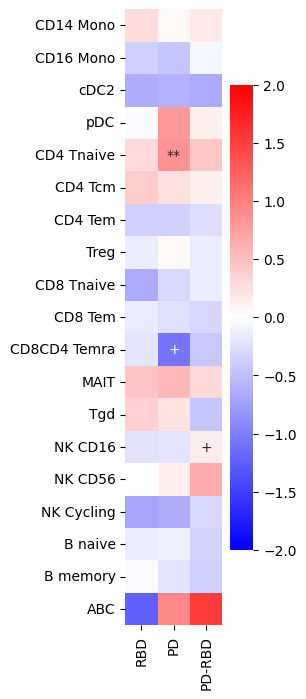

In [48]:
# Placeholder for significance annotations based on `Final Parameter`
annotations = pd.DataFrame('', index=df_fc.index, columns=df_fc.columns)

dict_symbols = {0.05: '**', 0.1: '*', 0.2: '+', 0.3: ''}

# Assign symbols based on cutoff
for p, df in dict_df_p.items():
    # Get rows marked as significant (Final Parameter is True)
    significant = df[df['Final Parameter'] == True]
    # print(significant)
    symbol = dict_symbols[p]
    
    # Update annotations for significant entries
    for pos,row in significant.iterrows():
        cell_type = row['Cell Type']
        condition = row['condition']
        if annotations.loc[cell_type, condition] == '':
            annotations.loc[cell_type, condition] = symbol

# Plot heatmap with annotations
plt.figure(figsize=(2, 8))
sns.heatmap(np.log2(df_fc), annot=annotations, fmt='', cmap="bwr", cbar=True, vmin=-2, vmax=2, square=True)
plt.xticks(rotation=90)
plt.savefig(os.path.join(outdir, 'scCODA_BLD_heatmap.pdf'), bbox_inches='tight')

## BLD split RBD

In [49]:
f_fc = '/home/yy693/pi_hafler/ASAP/scanpy/250407_BLD_downstream/scCODA_split_RBD_FC.csv'
f_credible = '/home/yy693/pi_hafler/ASAP/scanpy/250407_BLD_downstream/scCODA_split_RBD_woAge_credible.FDR{}.csv'

list_p = [0.05, 0.1, 0.2, 0.3]

In [50]:
df_fc =  pd.read_csv(f_fc, index_col=0).T
df_fc = df_fc.loc[list_celltypes_retain]
df_fc.head()

dict_df_p = {p: pd.read_csv(f_credible.format(p), index_col=0) for p in list_p}
for p, d in dict_df_p.items():
    d['condition'] = d.index.str.split('T.').str.get(1).str.replace(']', '')
    d = d[d['Cell Type'].isin(list_celltypes_retain)]
    dict_df_p[p] = d

dict_df_p[0.05].head()

,Cell Type,Final Parameter,condition
Covariate,,,
group[T.PD],B naive,False,PD
group[T.PD],B memory,False,PD
group[T.PD],ABC,False,PD
group[T.PD],CD4 Tnaive,True,PD
group[T.PD],CD4 Tcm,False,PD


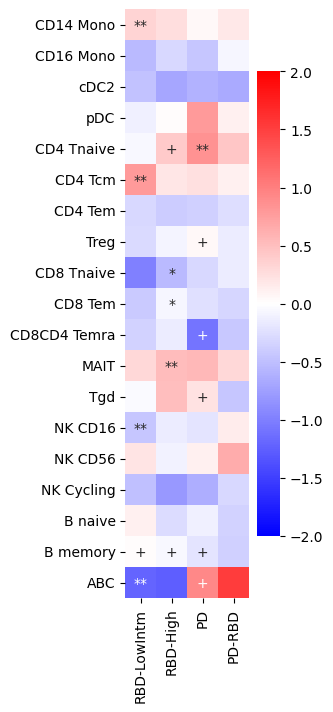

In [51]:
# Placeholder for significance annotations based on `Final Parameter`
annotations = pd.DataFrame('', index=df_fc.index, columns=df_fc.columns)

dict_symbols = {0.05: '**', 0.1: '*', 0.2: '+', 0.3: ''}

# Assign symbols based on cutoff
for p, df in dict_df_p.items():
    # Get rows marked as significant (Final Parameter is True)
    significant = df[df['Final Parameter'] == True]
    # print(significant)
    symbol = dict_symbols[p]
    
    # Update annotations for significant entries
    for pos,row in significant.iterrows():
        cell_type = row['Cell Type']
        condition = row['condition']
        if annotations.loc[cell_type, condition] == '':
            annotations.loc[cell_type, condition] = symbol

# Plot heatmap with annotations
plt.figure(figsize=(2, 8))
sns.heatmap(np.log2(df_fc), annot=annotations, fmt='', cmap="bwr", cbar=True, vmin=-2, vmax=2, square=True)
plt.xticks(rotation=90)
plt.savefig(os.path.join(outdir, 'scCODA_BLD_split_RBD_heatmap.pdf'), bbox_inches='tight')

## DEGs no split

In [55]:
th_lfc = 0.2
th_padj = 0.05
th_mean = 0.5

In [56]:
list_celltypes_retain = [
      'CSF Mac',
 'cDC1',
 'cDC2',
 'pDC',
    'CD14 Mono',
 'Cycling Myeloid',

'CD4 Tnaive', 'CD4 Tcm', 'CD4 Tem', 'Treg',
 'CD8 Tem_emra',
   'NK CD16','NK CD56', 'B memory'
]

In [57]:
list_d =[]
for celltype in list_celltypes_retain: 
    l = []
    for group in ['RBD', 'PD', 'PD-RBD']:
        f = f'/home/yy693/pi_hafler/ASAP/scanpy/241028_CSF_downstream/graph/deg_{celltype}_group_{group}.csv'
        if os.path.exists(f):
            d = pd.read_csv(f, index_col=0)
            l.append(d[(d['logfoldchanges'].abs() > th_lfc) & (d['pvals_adj'] < th_padj) & (d['mean'] > th_mean)].shape[0])
        else:
            l.append(np.nan)
    list_d.append(l)
df = pd.DataFrame(list_d, columns=['RBD', 'PD', 'PD-RBD'], index=list_celltypes_retain)

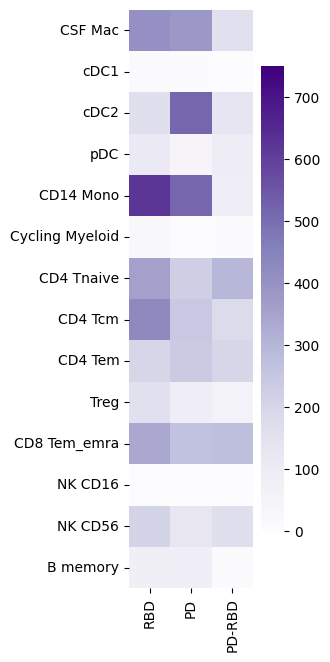

In [58]:
plt.figure(figsize=(2, 8))
sns.heatmap(df,cmap='Purples', annot=False, vmax=750, square=True)
plt.xticks(rotation=90)
plt.savefig(os.path.join(outdir, 'DEGs_CSF_heatmap.pdf'), bbox_inches='tight')

## DEGs split

In [59]:
list_d =[]
for celltype in list_celltypes_retain: 
    l = []
    for group in ['RBD-LowIntm', 'RBD-High']:
        f = f'/home/yy693/pi_hafler/ASAP/scanpy/250407_CSF_downstream/graph/deg_{celltype}_group_{group}.csv'
        if os.path.exists(f):
            d = pd.read_csv(f, index_col=0)
            l.append(d[(d['logfoldchanges'].abs() > th_lfc) & (d['pvals_adj'] < th_padj) & (d['mean'] > th_mean)].shape[0])
        else:
            l.append(np.nan)
    list_d.append(l)
df = pd.DataFrame(list_d, columns=['RBD-LowIntm', 'RBD-High'], index=list_celltypes_retain)

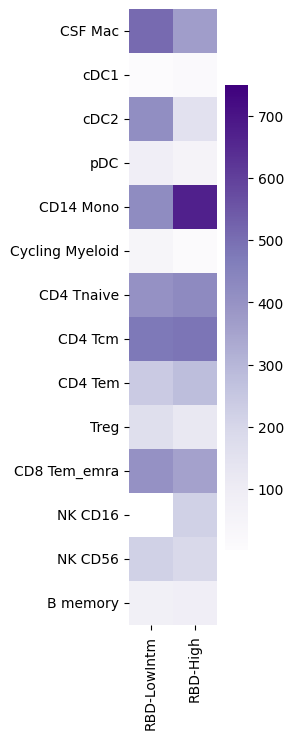

In [60]:
plt.figure(figsize=(2, 8))
sns.heatmap(df,cmap='Purples', annot=False, vmax=750, square=True)
plt.xticks(rotation=90)
plt.savefig(os.path.join(outdir, 'DEGs_split_RBD_CSF_heatmap.pdf'), bbox_inches='tight')

## DEGs no split

In [61]:
list_celltypes_retain = ['CD14 Mono', 'CD16 Mono', 'cDC2', 'pDC',
 'CD4 Tnaive',
 'CD4 Tcm',
  'CD4 Tem',
   'Treg',
    'CD8 Tnaive',
 'CD8 Tem',
 'CD8CD4 Temra',
 'MAIT',
 'Tgd',
 'NK CD16',
 'NK CD56',
 'NK Cycling',
 'B naive',
 'B memory',
 'ABC',
 ]

In [62]:
list_d =[]
for celltype in list_celltypes_retain: 
    l = []
    for group in ['RBD', 'PD', 'PD-RBD']:
        f = f'/home/yy693/pi_hafler/ASAP/scanpy/241028_BLD_downstream/graph/deg_{celltype}_group_{group}.csv'
        if os.path.exists(f):
            d = pd.read_csv(f, index_col=0)
            l.append(d[(d['logfoldchanges'].abs() > th_lfc) & (d['pvals_adj'] < th_padj) & (d['mean'] > th_mean)].shape[0])
        else:
            l.append(np.nan)
    list_d.append(l)
df = pd.DataFrame(list_d, columns=['RBD', 'PD', 'PD-RBD'], index=list_celltypes_retain)

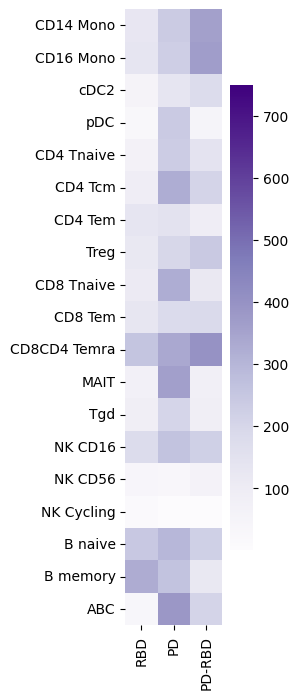

In [63]:
plt.figure(figsize=(2, 8))
sns.heatmap(df,cmap='Purples', annot=False, vmax=750, square=True)
plt.xticks(rotation=90)
plt.savefig(os.path.join(outdir, 'DEGs_BLD_heatmap.pdf'), bbox_inches='tight')

## DEGs split hyposmia

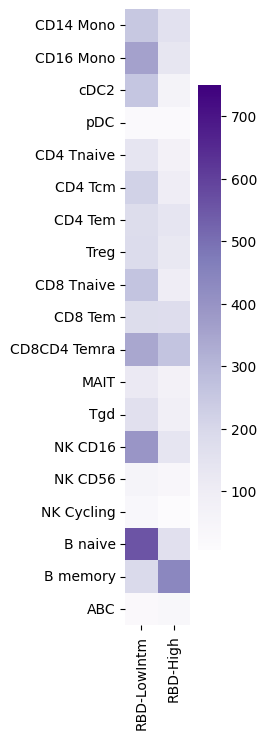

In [64]:
list_d =[]
for celltype in list_celltypes_retain: 
    l = []
    for group in ['RBD-LowIntm', 'RBD-High']:
        f = f'/home/yy693/pi_hafler/ASAP/scanpy/250407_BLD_downstream/graph/deg_{celltype}_group_{group}.csv'
        if os.path.exists(f):
            d = pd.read_csv(f, index_col=0)
            l.append(d[(d['logfoldchanges'].abs() > th_lfc) & (d['pvals_adj'] < th_padj) & (d['mean'] > th_mean)].shape[0])
        else:
            l.append(np.nan)
    list_d.append(l)
df = pd.DataFrame(list_d, columns=['RBD-LowIntm', 'RBD-High'], index=list_celltypes_retain)

plt.figure(figsize=(2, 8))
sns.heatmap(df,cmap='Purples', annot=False, vmax=750, square=True)
plt.xticks(rotation=90)
plt.savefig(os.path.join(outdir, 'DEGs_split_RBD_BLD_heatmap.pdf'), bbox_inches='tight')